# Sentiment Analysis Nuts and Bolts
>  Have you ever checked the reviews or ratings of a product or a service before you purchased it? Then you have very likely came face-to-face with sentiment analysis. In this chapter, you will learn the basic structure of a sentiment analysis problem and start exploring the sentiment of movie reviews.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Sentiment Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Introduction

### Elements of a sentiment analysis problem

<p>What are the three typical elements of a sentiment analysis system?</p>

<pre>
Possible Answers
Opinion, emotion, and subject.
<b>Opinion, subject, and opinion holder.</b>
Emotion, polarity, and opinion.
Opinion, subject, and polarity.
</pre>

### How many positive and negative reviews are there?

<div class=""><p>As a first step in a sentiment analysis task, similar to other data science problems, we might want to explore the dataset in more detail.</p>
<p>You will work with a sample of the IMDB movies reviews. A dataset called <code>movies</code> has been created for you. It is a sample of the data we saw in the slides. Feel free to explore it in the IPython Shell, calling the <code>.head()</code> method, for example.</p>
<p><em>Be aware that this exercise uses real data, and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real data).</em></p></div>

In [3]:
movies = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/sentiment-analysis-in-python/datasets/IMDB_sample.csv')

Instructions
<ul>
<li>Find the number of positive and negative reviews in the <code>movies</code> dataset.</li>
<li>Find the proportion (percentage) of positive and negative reviews in the dataset.</li>
</ul>

In [4]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


### Longest and shortest reviews

<p>In this exercise, you will continue to work with the <code>movies</code> dataset. You explored how many positive and negative reviews there are. Now your task is to explore the <code>review</code> column in more detail.</p>

Instructions 1/2
<p>Use the <code>review</code> column of the <code>movies</code> dataset to find the length of the longest review.</p>

In [6]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


Instructions 2/2
<p>Similarly, find the length of the shortest review.</p>

In [7]:
# How long is the longest review
print(min(length_reviews))

52


## Sentiment analysis types and approaches

### Detecting the sentiment of Tale of Two Cities

<div class=""><p>In the video we saw that one type of algorithms for detecting the sentiment are based on a lexicon of predefined words and their corresponding polarity score. Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the <code>textblob</code> library in Python.</p>
<p>You will work with the <code>two_cities</code> string. It contains the first sentence of Dickens's <em>Tale of Two Cities</em> novel. Feel free to explore it in the Shell.</p></div>

In [8]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

Instructions
<ul>
<li>Create a text blob object from the <code>two_cities</code> string.</li>
<li>Print out the polarity and subjectivity.</li>
</ul>

In [9]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


### Comparing the sentiment of two strings

<div class=""><p>In this exercise, you will compare the sentiment of two different strings. A string called <code>annak</code> has been defined for you and it contains the first sentence of <em>Anna Karenina</em>. A second string called <code>catcher</code> has been created and it contains the first sentence of <em>The Catcher in the Rye</em>. Feel free to explore both in the IPython Shell.</p>
<p>Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?</p></div>

In [10]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

Instructions
<ul>
<li>Import the required function from the appropriate package.</li>
<li>Create a text blob object from the <code>annak</code> string.</li>
<li>Create a text blob from the <code>catcher</code> string as well.</li>
<li>Print out the polarity and subjectivity of each of the created blobs.</li>
</ul>

In [11]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


**It shouldn't be surprising that the opening sentence of Catcher in the Rye has a negative score, whereas the one from Anna Karenina has a slightly positive one.**

### What is the sentiment of a movie review?

<div class=""><p>In a previous exercise, you detected the sentiment of the first sentence of the <em>Tale of Two Cities</em> novel by Dickens. Now you will continue to work with the <strong>movie reviews</strong> dataset. Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called <code>titanic</code> as it discusses the Titanic movie. Feel free to explore it in the Shell.</p>
<p>Can you calculate the polarity and subjectivity of the <code>titanic</code> string? This review is positive (i.e. has a <code>label</code> of <code>1</code>). Is the polarity score also positive?</p></div>

In [12]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

Instructions
<ul>
<li>Import the required functionality. </li>
<li>Create a text blob object from the <code>titanic</code> string.</li>
<li>Print out the result of its sentiment property.</li>
</ul>

In [13]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


**Did you notice that the polarity is around 0.2 and the review is classified as positive (has a label of 1)?**

## Let's build a word cloud!

<div class=""><p>We saw in the video that word clouds are very intuitive and a great and fast way to get a first impression on what a piece of text is talking about. </p>
<p>In this exercise, you will build your first word cloud. A string <code>east_of_eden</code> has been defined for you. It contains one of the first sentences of John Steinbeck's novel <em>East of Eden</em>. You can inspect its contents in the IPython Shell. </p>
<p>The <code>matplotlib.pyplot</code> package has been imported for you as <code>plt</code>.</p></div>

In [14]:
east_of_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

Instructions 1/2
<ul>
<li>Import the required package to build a word cloud. </li>
<li>Generate a word cloud using the <code>east_of_eden</code> string. The background color has been specified as <code>white</code>.</li>
</ul>

In [15]:
from wordcloud import WordCloud

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

Instructions 2/2
<ul>
<li>Create a figure from the word cloud object you generated in the previous step.</li>
<li>Display the image.</li>
</ul>

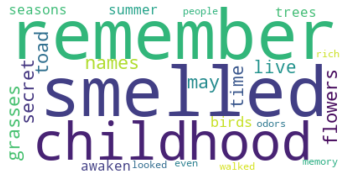

In [16]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

### Which words are in the word cloud?

<div class=""><p>Let's continue with the word cloud exercises. A string called <code>illuminated</code> has been defined for you. It contains an emotionally charged quote from the book '<em>Everything is Illuminated</em>' by Jonathan Safran Foer. Generate and display a word cloud using the <code>illuminated</code> string. Note that all required packages have been imported for you. </p>
<p>Which of the following answers contains <strong>only</strong> words you see in the word cloud?</p></div>

In [17]:
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

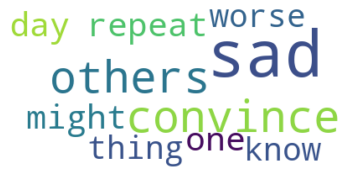

In [18]:
cloud_illuminated = WordCloud(background_color="white").generate(illuminated)
plt.imshow(cloud_illuminated, interpolation='bilinear')  
plt.axis('off')
plt.show()

<pre>
Possible Answers
Sad, other, happy.
Repeat, conversation , convince.
<b>Day, worse, others.</b>
Know, thing, everything.
</pre>

### Word Cloud on movie reviews

<div class=""><p>You have been working with the <strong>movie reviews</strong> dataset. You have explored the distribution of the reviews and have seen how long the longest and the shortest reviews are. But what do positive and negative reviews talk about?</p>
<p>In this exercise, you will practice building a word cloud of the top 100 positive reviews.</p>
<p>What are the words that pop up? Do they make sense to you?  </p>
<p>The string <code>descriptions</code> has been created for you by concatenating the descriptions of the top 100 positive reviews. A movie-specific set of stopwords (very frequent words, such as <em>the, a/an, and</em>, which will not be very informative and we'd like to exclude from the graph) is available as <code>my_stopwords</code>. Recall that the <code>interpolation</code> argument makes the word cloud appear more smoothly.</p></div>

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Adding the stopwords
stop_words = stopwords.words('english') 
new_stopwords = ["you'll", "you're", 'yourselves', 'br']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

In [45]:
descriptions = ' '.join( movies.review[movies.label == 1][:100])

Instructions
<ul>
<li>Import the wordcloud function from the respective package.</li>
<li>Apply the word cloud function to the <code>descriptions</code> string. Set the background color as 'white', and change the <code>stopwords</code> argument. </li>
<li>Create a wordcloud image.  </li>
<li>Finally, do not forget to display the image.</li>
</ul>

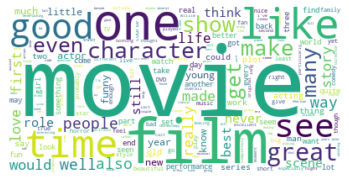

In [46]:
# Import the word cloud function  
from wordcloud import WordCloud

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=stop_words).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()